In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
train = pd.read_csv('fraudTrain.csv', header = 0)
test = pd.read_csv('fraudTest.csv', header = 0)
train.isnull().values.any()
test.isnull().values.any()
combined = pd.concat([train, test], axis = 0)
combined.drop(labels = ["first","last","job","dob","trans_num","street","trans_date_trans_time","city","state"],axis = 1, inplace = True)

In [ ]:
from sklearn.impute import SimpleImputer
def preprocess_and_train(combined):
    encoder = LabelEncoder()
    if "merchant" in combined.columns:
        combined["merchant"] = combined["merchant"].fillna("Unknown")
        combined["merchant_new"] = encoder.fit_transform(combined["merchant"])
        combined.drop("merchant", axis=1, inplace=True)
    if "category" in combined.columns:
        combined["category"] = combined["category"].fillna("Unknown")
        combined["category_new"] = encoder.fit_transform(combined["category"])
        combined.drop("category", axis=1, inplace=True)
    combined = pd.get_dummies(combined, drop_first=True)
    if "gender_F" in combined.columns:
        combined.drop("gender_F", axis=1, inplace=True)
    fraud_columns = [col for col in combined.columns if "fraud" in col.lower()]
    if fraud_columns:
        fraud_column = fraud_columns[0]
        combined.rename(columns={fraud_column: "is_fraud"}, inplace=True)
    else:
        raise ValueError(f"Fraud column not found. Available columns: {list(combined.columns)}")
    combined.replace([np.inf, -np.inf], np.nan, inplace=True)
    combined["is_fraud"] = combined["is_fraud"].fillna(0).astype(int)
    y = combined["is_fraud"]
    combined.drop("is_fraud", axis=1, inplace=True)
    imputer = SimpleImputer(strategy="mean")
    combined_imputed = imputer.fit_transform(combined)
    combined = pd.DataFrame(combined_imputed, columns=combined.columns)
    if combined.isna().sum().sum() > 0:
        combined.dropna(inplace=True)
    x_train, x_test, y_train, y_test = train_test_split(combined, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    return {
        "confusion_matrix": confusion_matrix(y_test, prediction),
        "classification_report": classification_report(y_test, prediction, output_dict=True),
        "accuracy_score": accuracy_score(y_test, prediction)
    }
results = preprocess_and_train(combined)
print("Confusion Matrix:\n", results["confusion_matrix"])
print("Accuracy Score:", results["accuracy_score"])
print("Classification Report:\n", results["classification_report"])

Confusion Matrix:
 [[319449      0]
 [  1661      0]]
Accuracy Score: 0.9948273177415838
Classification Report:
 {'0': {'precision': 0.9948273177415838, 'recall': 1.0, 'f1-score': 0.9974069523650436, 'support': 319449.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1661.0}, 'accuracy': 0.9948273177415838, 'macro avg': {'precision': 0.4974136588707919, 'recall': 0.5, 'f1-score': 0.4987034761825218, 'support': 321110.0}, 'weighted avg': {'precision': 0.9896813921249142, 'recall': 0.9948273177415838, 'f1-score': 0.9922476831181241, 'support': 321110.0}}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


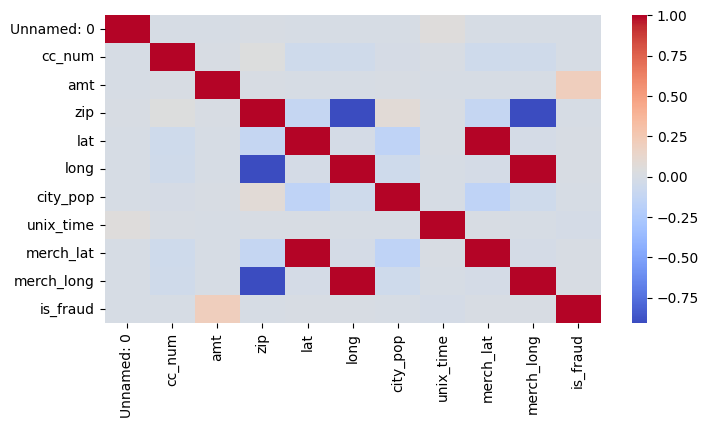

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.show()